# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [35]:
#pip install html5lib
#pip install bs4
#pip install requests

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [37]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [38]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...


In [39]:
df.head(20)

,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...
5,✅ Trip Verified | Online check in worked fine...
6,✅ Trip Verified |. The BA first lounge at Term...
7,Not Verified | Paid a quick visit to Nice yest...
8,✅ Trip Verified | Words fail to describe this...
9,✅ Trip Verified | Absolutely terrible experie...


In [40]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [41]:
df["reviews"]=df["reviews"].str.split('|', 1).str[-1]

In [42]:
df.head(20)

,reviews
0,My itinerary was supposed to be Las Vegas-Ch...
1,Busy day at LHR and flight full. Lounge crow...
2,Worst seats I have ever encountered in econom...
3,Top Ten REASONS to not use British Airways To...
4,Easy check in on the way to Heathrow. The fl...
5,Online check in worked fine. Quick security ...
6,. The BA first lounge at Terminal 5 was a zoo...
7,Paid a quick visit to Nice yesterday from Hea...
8,Words fail to describe this last awful fligh...
9,Absolutely terrible experience. The app woul...


In [43]:
df.tail(20)

,reviews
980,Bad service and attitude all round. My fiasc...
981,London to Santiago de Chile. I was flying pr...
982,Flew a now ageing B777 flight BA 0053 to Sea...
983,Flew London Gatwick to Tirana Rinas. Bag drop...
984,London Heathrow to Murcia and back. A few pr...
985,London to Amsterdam. BA's service has gone n...
986,Aberdeen to Abu Dhabi via London. Despite be...
987,Prague to Denver via London. I almost missed...
988,Seville to Gatwick. If it wasn't for Avios a...
989,London to Amsterdam. A delayed BA flight by ...


In [44]:
df.to_csv("BA_reviews1.csv")
#Trip verified and non verified status exluded

In [45]:
#Converting all text to lower case to avoid confusion in analysis & removing punctuation to eliminate its effect on dataset.
df["reviews"] = df["reviews"].str.lower()

In [46]:
import string

In [47]:
translator = str.maketrans('', '', string.punctuation)

# Remove punctuations from 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: x.translate(translator))

In [48]:
df.head(20)

,reviews
0,my itinerary was supposed to be las vegaschi...
1,busy day at lhr and flight full lounge crowd...
2,worst seats i have ever encountered in econom...
3,top ten reasons to not use british airways to...
4,easy check in on the way to heathrow the fli...
5,online check in worked fine quick security c...
6,the ba first lounge at terminal 5 was a zoo ...
7,paid a quick visit to nice yesterday from hea...
8,words fail to describe this last awful fligh...
9,absolutely terrible experience the app would...


In [49]:
import numpy as np
df['reviews'].replace('', np.nan, inplace=True)
df.dropna(subset=['reviews'], inplace=True)

In [50]:
df.to_csv("BA_reviews2.csv")
#Excluded punctuation and converted test to lower case

In [51]:
#performing sentimental analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
# Initialize the sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
# Perform sentiment analysis on each review
df['Sentiment'] = df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
# Classify sentiments based on the compound score
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x >= 0.1 else ('Negative' if x <= -0.1 else 'Neutral'))

In [53]:
df.head(20)

,reviews,Sentiment,Sentiment_Label
0,my itinerary was supposed to be las vegaschi...,-0.9246,Negative
1,busy day at lhr and flight full lounge crowd...,0.9795,Positive
2,worst seats i have ever encountered in econom...,-0.9349,Negative
3,top ten reasons to not use british airways to...,-0.8112,Negative
4,easy check in on the way to heathrow the fli...,-0.0516,Neutral
5,online check in worked fine quick security c...,0.8479,Positive
6,the ba first lounge at terminal 5 was a zoo ...,-0.1289,Negative
7,paid a quick visit to nice yesterday from hea...,0.9763,Positive
8,words fail to describe this last awful fligh...,-0.9737,Negative
9,absolutely terrible experience the app would...,-0.9668,Negative


In [54]:
import matplotlib.pyplot as plt

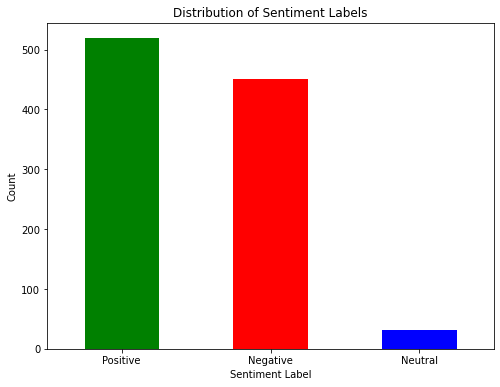

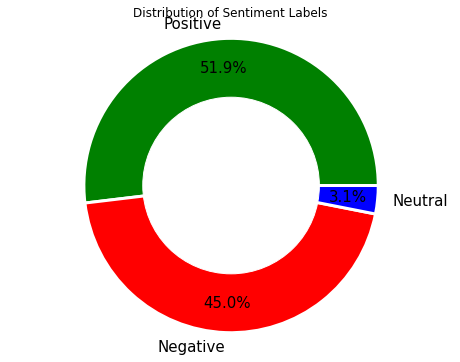

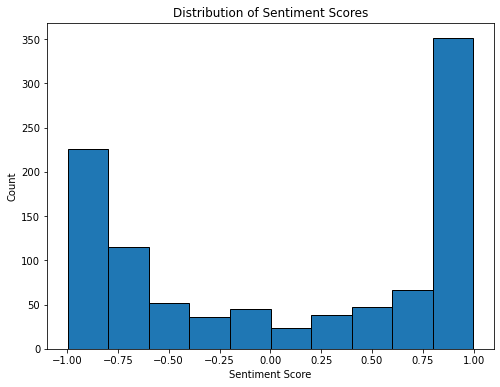

In [55]:
# Count the number of occurrences of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', rot=0, color=['green','red','blue'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
colors=['green','red','blue'], wedgeprops={'linewidth': 3, 'edgecolor': 'white'},textprops={'fontsize': 15}, pctdistance=0.80)

# Create a white circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.ylabel('')
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')
plt.show()

# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [56]:
#performing topic modelling analysis
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [57]:
#Function to preprocess the text (removing stop words etc)
# Preprocess the text
def preprocess_text(text):
    # Tokenize the text and remove punctuation
    tokens = gensim.utils.simple_preprocess(text, deacc=True)

    # Remove stopwords
    tokens = [token for token in tokens if token not in STOPWORDS]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    return tokens

In [58]:
# Apply preprocessing to the text data
df['preprocessed_text'] = df['reviews'].apply(preprocess_text)

In [59]:
# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(df['preprocessed_text'])

In [60]:
# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['preprocessed_text']]


In [61]:
# Train the LDA model
lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=10)

In [62]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print()

Topic: 0 
Words: 0.035*"flight" + 0.010*"service" + 0.009*"london" + 0.008*"time" + 0.008*"seat" + 0.007*"good" + 0.007*"british" + 0.007*"airways" + 0.006*"hours" + 0.006*"customer"

Topic: 1 
Words: 0.018*"flight" + 0.013*"cabin" + 0.012*"service" + 0.012*"food" + 0.009*"economy" + 0.009*"london" + 0.009*"crew" + 0.008*"seats" + 0.007*"seat" + 0.006*"good"

Topic: 2 
Words: 0.019*"class" + 0.015*"business" + 0.014*"flight" + 0.009*"seat" + 0.009*"london" + 0.009*"service" + 0.008*"seats" + 0.008*"plane" + 0.007*"staff" + 0.007*"airways"

Topic: 3 
Words: 0.009*"flight" + 0.006*"cabin" + 0.005*"airways" + 0.005*"crew" + 0.005*"british" + 0.005*"seat" + 0.005*"london" + 0.005*"luggage" + 0.004*"service" + 0.004*"delayed"

Topic: 4 
Words: 0.021*"flight" + 0.012*"service" + 0.012*"crew" + 0.010*"food" + 0.009*"london" + 0.009*"time" + 0.007*"good" + 0.007*"cabin" + 0.006*"staff" + 0.006*"seat"



In [63]:
# Assign topics to the reviews
df['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in doc_term_matrix]

In [64]:
df.head(10)

,reviews,Sentiment,Sentiment_Label,preprocessed_text,topic
0,my itinerary was supposed to be las vegaschi...,-0.9246,Negative,"[itinerary, supposed, las, landed, london, hea...",0
1,busy day at lhr and flight full lounge crowd...,0.9795,Positive,"[busy, day, lhr, flight, lounge, crowded, gate...",4
2,worst seats i have ever encountered in econom...,-0.9349,Negative,"[worst, seats, encountered, economy, class, le...",2
3,top ten reasons to not use british airways to...,-0.8112,Negative,"[reasons, use, british, airways, aware, notice...",0
4,easy check in on the way to heathrow the fli...,-0.0516,Neutral,"[easy, check, way, heathrow, flight, time, iss...",0
5,online check in worked fine quick security c...,0.8479,Positive,"[online, check, worked, fine, quick, security,...",0
6,the ba first lounge at terminal 5 was a zoo ...,-0.1289,Negative,"[lounge, terminal, zoo, dirty, tables, tablewa...",0
7,paid a quick visit to nice yesterday from hea...,0.9763,Positive,"[paid, quick, visit, nice, yesterday, heathrow...",0
8,words fail to describe this last awful fligh...,-0.9737,Negative,"[words, fail, awful, flight, baby, aisle, cryi...",0
9,absolutely terrible experience the app would...,-0.9668,Negative,"[absolutely, terrible, experience, app, let, c...",0


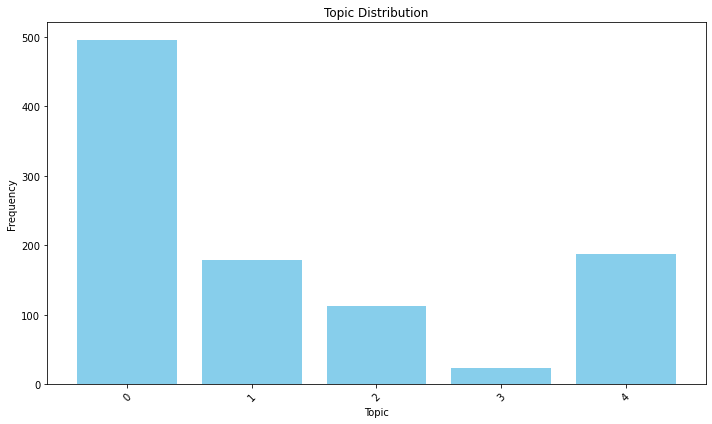

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the topic modeling results stored in 'lda_model' and 'doc_term_matrix'

# Get the topic distribution for each document
topic_distribution = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in doc_term_matrix]

# Calculate the frequency of each topic
topic_counts = {}
for topic in topic_distribution:
    topic_counts[topic] = topic_counts.get(topic, 0) + 1

# Sort the topics based on their frequencies
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)
topics, counts = zip(*sorted_topics)

# Get the topic labels based on the topic IDs
#topic_labels = [topic_mapping[topic] for topic in topics]

# Generate a bar chart to visualize the topic distribution with labels
plt.figure(figsize=(10, 6))
plt.bar(topics, counts, color='skyblue')

# Customize the plot
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [66]:
#saving dataset after sentimental analysis and topic modeling
df.to_csv("BA_reviews3.csv")

In [67]:
# Study of Topic Modelling topics key words suggest following topics for Topic indexes
#Topic 0: service, time, seat, hours, customer -> pre departure process (flight timing, seat bookings)
#Topic 1: cabin, service, food, economy, crew, seats, seat -> Economy class (Seats, food, cabin crew) 
#Topic 2: class, business, seat, service, staff -> Business class (service, crew)
#Topic 3: cabin, crew, seat, luggage, service, delayed -> Flight crew (luggage, seats)
#Topic 4: service, crew, food, time, cabin, staff, seat -> Food service


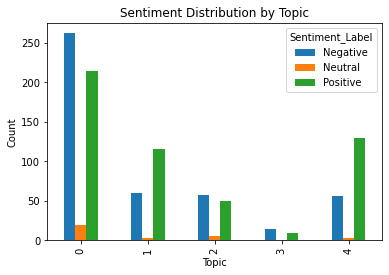

In [70]:
#Now we will perform sentimental analysis of each topic to further analyze which areas are lacking positive reviews
# Group the DataFrame by 'topic' and calculate the counts of each 'Sentiment_Label'
grouped_df = df.groupby('topic')['Sentiment_Label'].value_counts().unstack()

# Plot the bar plot
grouped_df.plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Topic')

# Show the plot
plt.show()

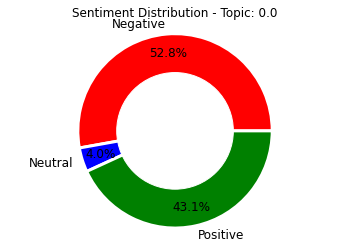

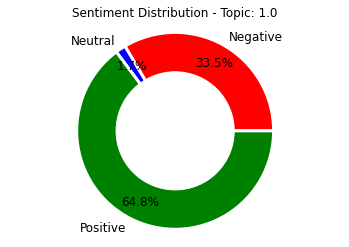

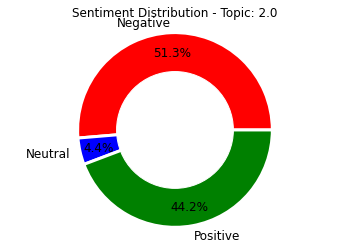

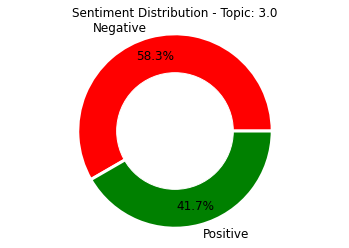

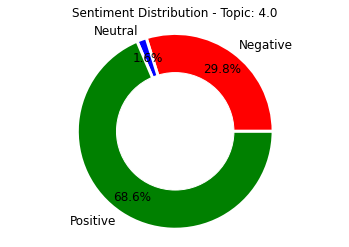

In [81]:
# Define custom colors for sentiment classes
custom_colors = {
    'Positive': 'green',
    'Neutral': 'blue',
    'Negative': 'red'
}

# Group the DataFrame by 'topic' and 'Sentiment_Label' and calculate the counts
grouped_df = df.groupby(['topic', 'Sentiment_Label']).size().unstack()

# Reset the index of the grouped DataFrame
grouped_df.reset_index(inplace=True)

# Plot pie charts for each topic
for _, row in grouped_df.iterrows():
    topic = row['topic']
    sentiment_counts = row.drop('topic')
    # Remove NaN values from sentiment_counts
    sentiment_counts = sentiment_counts.dropna()

    labels = sentiment_counts.index
    counts = sentiment_counts.values

    # Get colors for the sentiment classes
    colors = [custom_colors.get(label, 'blue') for label in labels]

    # Plot pie chart with custom colors and donut shape
    plt.pie(counts, labels=labels,textprops={'fontsize': 12}, pctdistance=0.80, colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(f"Sentiment Distribution - Topic: {topic}")

    # Set aspect ratio to be equal so that pie is drawn as a circle
    plt.axis('equal')

    # Draw a white circle at the center to create the donut shape
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

    # Show the pie chart
    plt.show()
